## Install dependencies 

In [4]:
#!s
%pip show fastai

Name: fastai
Version: 1.0.60
Summary: fastai makes deep learning with PyTorch faster, more accurate, and easier
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, packaging, torchvision, numexpr, matplotlib, nvidia-ml-py3, fastprogress, beautifulsoup4, Pillow, requests, pandas, bottleneck, torch, spacy, pyyaml, numpy
Required-by: 


In [5]:
#!s
%pip install fastai -U

     |████████████████████████████████| 189 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 51 kB 141 kB/s  eta 0:00:01
     |████████████████████████████████| 11.6 MB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 43.3 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 57.8 MB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 56.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 54.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 90.5 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 8.2 MB/s  eta 0:00:01
     |████████████████████████████████| 227 kB 66.5 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 64.1 MB/s eta 0:00:01
     |████████████████████████████████| 269 kB 59.6 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 6.1 MB/s  eta 0:00:01
     |████████████████████████████████| 155 kB 72.9 MB/s eta 0:00:01
     |███████████████████████████████

In [6]:
#!s
%pip show torch

Name: torch
Version: 1.7.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /home/jupyter/work/pyenv
Requires: numpy, typing-extensions, dataclasses, future
Required-by: torchvision, fastai, torch-optimizer, pytorch-ranger, enot-utils, enot-core


In [7]:
#!s
%pip show fastai

Name: fastai
Version: 2.1.8
Summary: fastai simplifies training fast and accurate neural nets using modern best practices
Home-page: https://github.com/fastai/fastai/tree/master/
Author: Jeremy Howard, Sylvain Gugger, and contributors
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /home/jupyter/work/pyenv
Requires: spacy, fastprogress, requests, pyyaml, packaging, pandas, pillow, pip, matplotlib, torchvision, fastcore, scipy, scikit-learn, torch
Required-by: 


In [8]:
#!s
from fastai.vision.all import *

/home/jupyter/work/pyenv/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


## Prepare dataset

In [9]:
#!s
%cd yc-fastai-test

/home/jupyter/work/resources/yc-fastai-test


Set training data path.

In [21]:
#!s
path = Path('data/oxford-iiit-pet/images')

Download and untar data if needed.

In [10]:
#!s
path = untar_data(URLs.PETS, dest='data')/'images'

Path('data/oxford-iiit-pet/images')

## Start learning

In [22]:
#!L
%cd yc-fastai-test

/home/jupyter/work/resources/yc-fastai-test


In [23]:
#!L
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [24]:
#!L
learn.fine_tune(10)

epoch     train_loss  valid_loss  error_rate  time    
0         0.152328    0.022743    0.007442    00:38     
epoch     train_loss  valid_loss  error_rate  time    
0         0.051761    0.016439    0.004060    00:41     
1         0.040596    0.014790    0.004060    00:41     
2         0.028513    0.018909    0.007442    00:40     
3         0.031448    0.020578    0.005413    00:41     
4         0.020683    0.020188    0.008119    00:41     
5         0.012921    0.007791    0.004060    00:40     
6         0.010650    0.013314    0.004060    00:41     
7         0.005800    0.015330    0.005413    00:41     
8         0.003315    0.014511    0.004736    00:41     
9         0.001023    0.011433    0.003383    00:40     


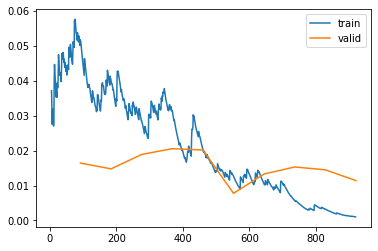

In [25]:
#!L
learn.recorder.plot_loss()

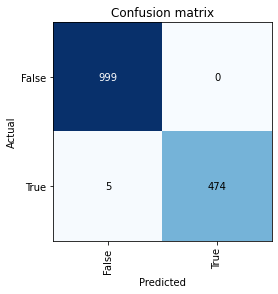

In [26]:
#!L
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

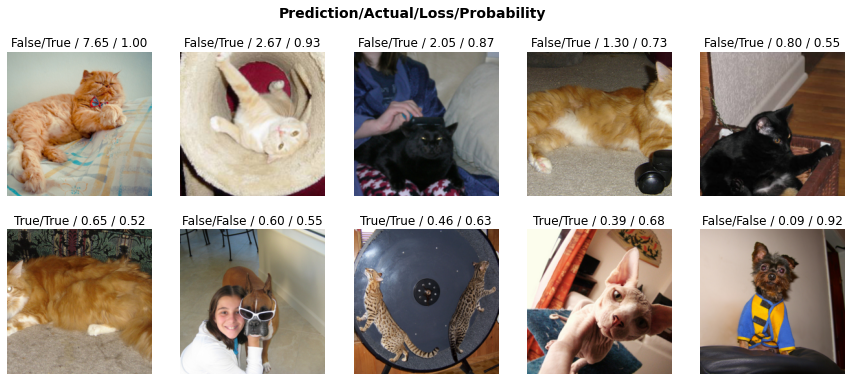

In [27]:
#!L
interp.plot_top_losses(10, nrows=2)

In [ ]:
#!L
